In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [9]:

url = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2025-06.parquet"
df = pd.read_parquet(url, engine="pyarrow")


In [10]:
# --- 1. Estadísticas descriptivas ---
# Variables numéricas
num_cols = ["trip_distance", "fare_amount", "tip_amount", "tolls_amount"]

print("=== Estadísticas descriptivas ===")
print(df[num_cols].describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99]))

# Mediana por separado
print("\nMediana de cada variable:")
print(df[num_cols].median())

=== Estadísticas descriptivas ===
       trip_distance   fare_amount    tip_amount  tolls_amount
count   49390.000000  49390.000000  49390.000000  49390.000000
mean       10.120118     18.804332      2.772294      0.273023
std       618.776893     18.127869      3.759889      1.484335
min         0.000000   -200.000000     -0.900000      0.000000
25%         1.260000     10.000000      0.000000      0.000000
50%         2.030000     14.200000      2.160000      0.000000
75%         3.560000     21.200000      4.000000      0.000000
95%         9.735500     49.000000      8.580000      0.000000
99%        17.752200     90.000000     15.980000      6.940000
max     77463.550000    588.200000    153.300000     49.940000

Mediana de cada variable:
trip_distance     2.03
fare_amount      14.20
tip_amount        2.16
tolls_amount      0.00
dtype: float64


En este código se calcula y muestra la media, desviación estándar, etc., para cada variable numérica específica. Además, se imprime la mediana de cada variable por separado.

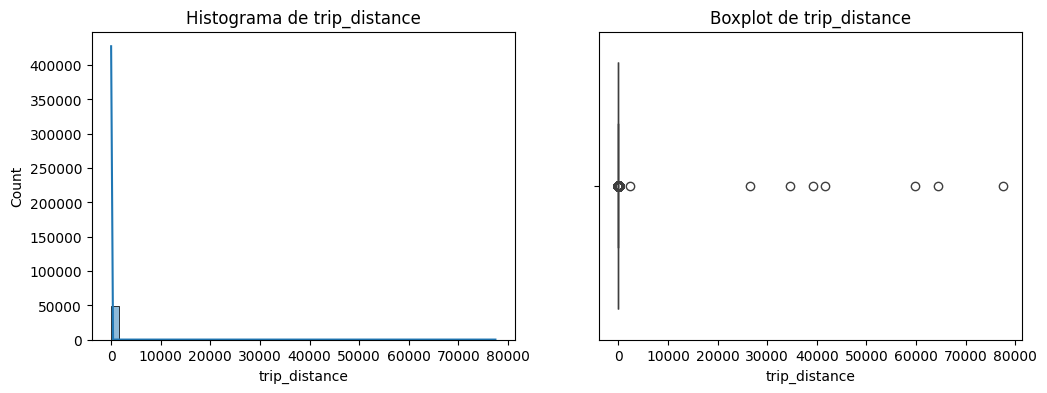

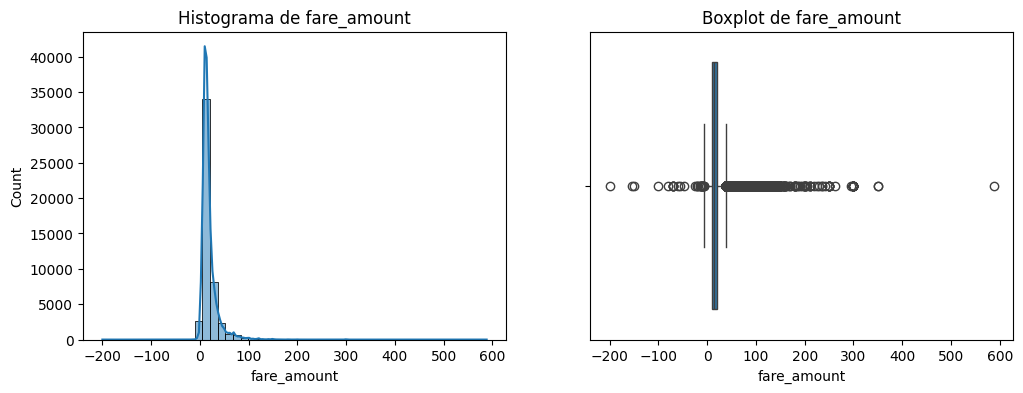

In [12]:
# --- 2. Histogramas y Boxplots ---
for col in ["trip_distance", "fare_amount"]:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histograma
    sns.histplot(df[col], bins=50, kde=True, ax=axes[0])
    axes[0].set_title(f"Histograma de {col}")

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot de {col}")

    plt.show()

En este código se generan histogramas y boxplots para las variables numéricas trip_distance y fare_amount. Los histogramas muestran la distribución de los datos, mientras que los boxplots ayudan a identificar posibles outliers.


Frecuencia de valores en payment_type:
payment_type
1.0    74.610240
2.0    24.396448
3.0     0.684136
4.0     0.298213
5.0     0.010964
Name: proportion, dtype: float64


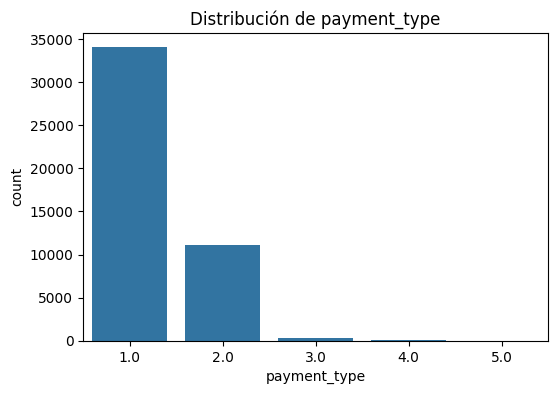


Frecuencia de valores en VendorID:
VendorID
2    85.861510
1    10.599312
6     3.539178
Name: proportion, dtype: float64


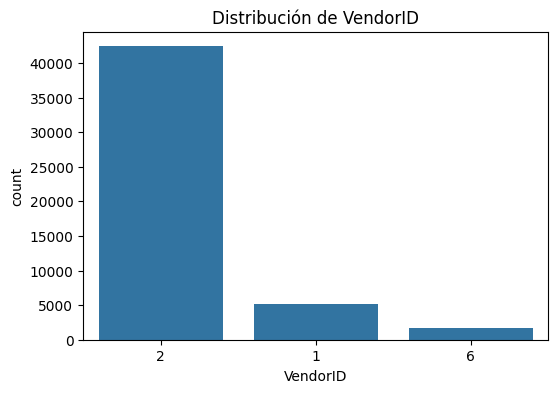


Frecuencia de valores en RatecodeID:
RatecodeID
1.0     93.193729
5.0      6.264664
2.0      0.317948
4.0      0.111830
3.0      0.074553
99.0     0.035084
6.0      0.002193
Name: proportion, dtype: float64


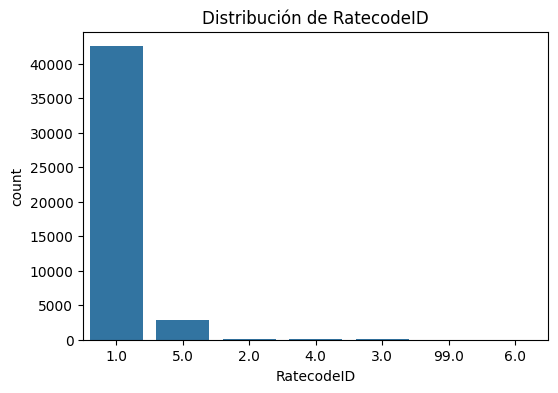

In [13]:
# --- 3. Frecuencias de variables categóricas ---
cat_cols = ["payment_type", "VendorID", "RatecodeID"]

for col in cat_cols:
    print(f"\nFrecuencia de valores en {col}:")
    print(df[col].value_counts(normalize=True) * 100)

    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Distribución de {col}")
    plt.show()

En este código se calculan las frecuencias relativas (en porcentaje) de los valores en las variables categóricas payment_type, VendorID y RatecodeID. Además, se generan gráficos de barras para visualizar la distribución de cada variable.


Viajes con tarifas negativas: 156
Viajes con distancias extremas (>100 millas): 9


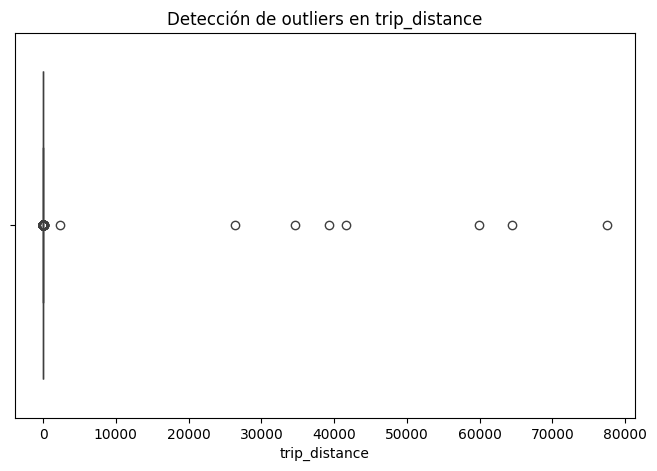

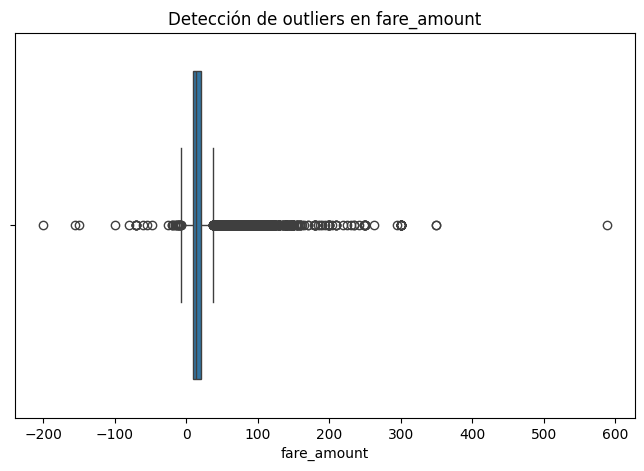

In [14]:
# --- 4. Identificación de Outliers ---
# Ejemplo: tarifas negativas o distancias extremas
outliers_fare = df[df["fare_amount"] < 0]
outliers_distance = df[df["trip_distance"] > 100]  # >100 millas poco probable

print(f"\nViajes con tarifas negativas: {len(outliers_fare)}")
print(f"Viajes con distancias extremas (>100 millas): {len(outliers_distance)}")

# Visualización de outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["trip_distance"])
plt.title("Detección de outliers en trip_distance")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["fare_amount"])
plt.title("Detección de outliers en fare_amount")
plt.show()

En este código se identifican outliers en las variables fare_amount y trip_distance. Se detectan tarifas negativas y distancias mayores a 100 millas como casos extremos. Además, se generan boxplots para visualizar los outliers en ambas variables.